In [1]:
import pandas as pd


In [2]:
#LOAD RAW DATA

df= pd.read_csv("C:\\Users\\bharath\\Downloads\\fraud_detection_dataset_LLM.csv")
df

,transaction_id,customer_id,kyc_verified,account_age_days,transaction_amount,channel,timestamp,is_fraud
0,TXN_200000,CUST_799,Yes,1050,256369,Mobile,2025-08-12 02:10:24,0
1,TXN_200001,CUST_484,Yes,295,6581,Mobile,2025-08-25 01:14:31,0
2,TXN_200002,CUST_791,Yes,2083,4492,Mobile,2025-08-17 12:12:40,0
3,TXN_200003,CUST_664,Yes,2789,275413,POS,2025-08-07 06:23:54,0
4,TXN_200004,CUST_157,Yes,694,98098,POS,2025-08-20 21:55:54,0
...,...,...,...,...,...,...,...,...
4995,TXN_204995,CUST_524,Yes,63,5308,ATM,2025-08-01 23:36:52,0
4996,TXN_204996,CUST_776,Yes,542,22337,POS,2025-08-17 00:14:10,0
4997,TXN_204997,CUST_347,Yes,483,7547,Mobile,2025-08-25 12:58:46,0
4998,TXN_204998,CUST_452,Yes,2846,7803,Mobile,2025-08-10 10:20:19,0


In [3]:
#HANDLE MISSING VALUES
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64


In [4]:
# Fill missing KYC values with "No"
df.fillna({"kyc_verified": "No"}, inplace=True)

# Drop rows where transaction_amount is missing
df.dropna(subset=["transaction_amount"], inplace=True)

In [5]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64


In [6]:
#Remove Duplicates
df.drop_duplicates(subset="transaction_id", inplace=True)


In [7]:
#Standardize Columns
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["channel"] = df["channel"].str.title()
df["transaction_amount"] = df["transaction_amount"].astype(float)

In [8]:
#Feature Engineering
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["weekday"] = df["timestamp"].dt.weekday

In [9]:
# Create binary feature for high value transactions
df["is_high_value"] = (df["transaction_amount"] > 50000).astype(int)


In [10]:
#Save Processed Data
output_path = "C:\\Users\\bharath\\Downloads\\transactions_processed.csv"
df.to_csv(output_path, index=False)

In [11]:
print(f"\n✅ Data cleaning & preprocessing complete. File saved at: {output_path}")


✅ Data cleaning & preprocessing complete. File saved at: C:\Users\bharath\Downloads\transactions_processed.csv


In [12]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

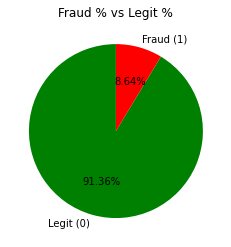

In [13]:
#Fraud % vs Legit %
fraud_counts = df["is_fraud"].value_counts(normalize=True) * 100
plt.pie(fraud_counts, labels=["Legit (0)", "Fraud (1)"], autopct="%.2f%%", startangle=90, colors=["green","red"])
plt.title("Fraud % vs Legit %")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Fraud_vs_Legit.png")
plt.show()

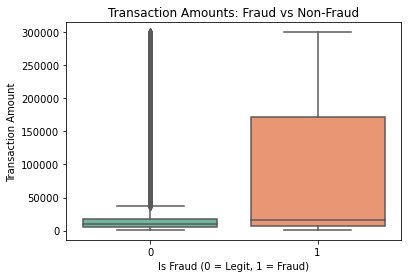

In [14]:
# Avg Transaction Amount: Fraud vs Non-Fraud
sns.boxplot(x="is_fraud", y="transaction_amount", data=df, palette="Set2")
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Avg_Transaction_Amount.png")
plt.show()

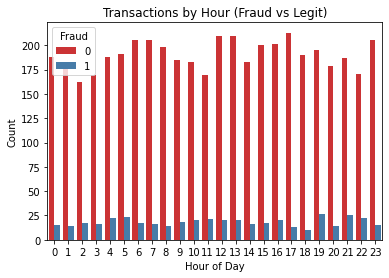

In [15]:
# Transactions by Hour of Day
sns.countplot(x="hour", hue="is_fraud", data=df, palette="Set1")
plt.title("Transactions by Hour (Fraud vs Legit)")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Transactions_by_hour.png")
plt.show()


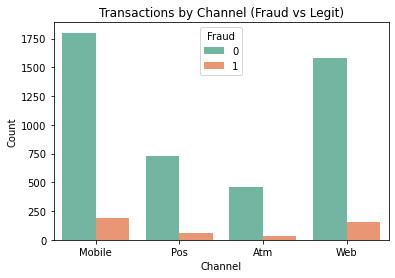

In [16]:
#Transactions by Channel
sns.countplot(x="channel", hue="is_fraud", data=df, palette="Set2")
plt.title("Transactions by Channel (Fraud vs Legit)")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Transactions_by_channel.png")
plt.show()

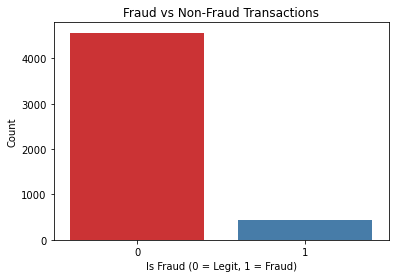

In [17]:
#Fraud vs Non-Fraud Distribution (countplot)
sns.countplot(x="is_fraud", data=df, palette="Set1")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Fraud_vs_Non-Fraud_distribution.png")
plt.show()

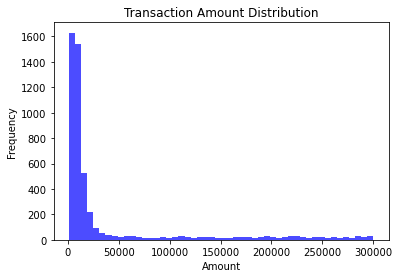

In [18]:
#Transaction Amount Distribution (histogram)
plt.hist(df["transaction_amount"], bins=50, color="blue", alpha=0.7)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\Transaction_Amount_Distribution.png")
plt.show()

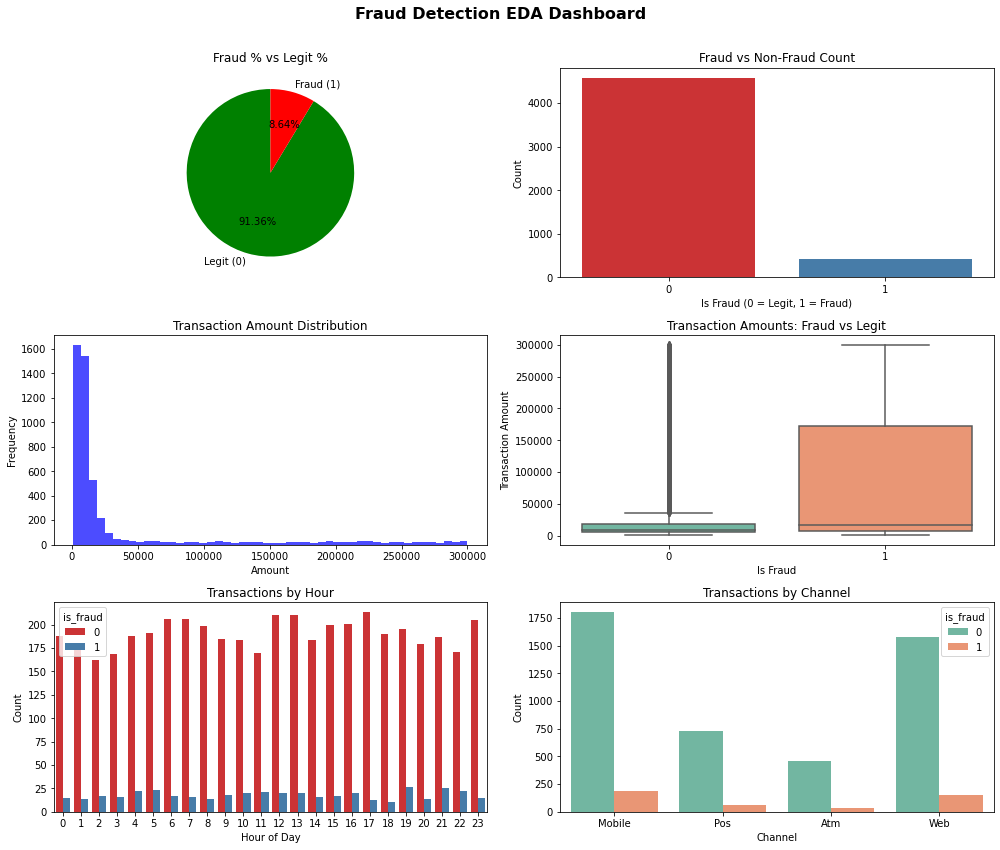

In [19]:
#SINGLE SUMMARY DASHBOARD PLOT
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Fraud Detection EDA Dashboard", fontsize=16, fontweight="bold")

# 1. Fraud % vs Legit % (Pie)
fraud_counts = df["is_fraud"].value_counts(normalize=True) * 100
axes[0,0].pie(fraud_counts, labels=["Legit (0)", "Fraud (1)"],
              autopct="%.2f%%", startangle=90, colors=["green","red"])
axes[0,0].set_title("Fraud % vs Legit %")

# 2. Fraud vs Non-Fraud Distribution (Bar)
sns.countplot(x="is_fraud", data=df, palette="Set1", ax=axes[0,1])
axes[0,1].set_title("Fraud vs Non-Fraud Count")
axes[0,1].set_xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
axes[0,1].set_ylabel("Count")

# 3. Transaction Amount Distribution (Histogram)
axes[1,0].hist(df["transaction_amount"], bins=50, color="blue", alpha=0.7)
axes[1,0].set_title("Transaction Amount Distribution")
axes[1,0].set_xlabel("Amount")
axes[1,0].set_ylabel("Frequency")

# 4. Avg Transaction Amount (Boxplot Fraud vs Legit)
sns.boxplot(x="is_fraud", y="transaction_amount", data=df, palette="Set2", ax=axes[1,1])
axes[1,1].set_title("Transaction Amounts: Fraud vs Legit")
axes[1,1].set_xlabel("Is Fraud")
axes[1,1].set_ylabel("Transaction Amount")

# 5. Transactions by Hour (Fraud vs Legit)
sns.countplot(x="hour", hue="is_fraud", data=df, palette="Set1", ax=axes[2,0])
axes[2,0].set_title("Transactions by Hour")
axes[2,0].set_xlabel("Hour of Day")
axes[2,0].set_ylabel("Count")

# 6. Transactions by Channel (Fraud vs Legit)
sns.countplot(x="channel", hue="is_fraud", data=df, palette="Set2", ax=axes[2,1])
axes[2,1].set_title("Transactions by Channel")
axes[2,1].set_xlabel("Channel")
axes[2,1].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for main title
plt.savefig("C:\\Users\\bharath\\Desktop\\LLM\\backend\\EDA\\SINGLE_SUMMARY_DASHBOARD PLOT.png")

plt.show()

In [20]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Stratified split to maintain fraud ratio
train, test = train_test_split(
    df,
    test_size=0.2,
    stratify=df["is_fraud"],
    random_state=42
)

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# Save train and test sets
train.to_csv("C:\\Users\\bharath\\Downloads\\train.csv", index=False)
test.to_csv("C:\\Users\\bharath\\Downloads\\test.csv", index=False)


Train Shape: (4000, 13)
Test Shape: (1000, 13)


In [21]:
#LABEL TRANSACTION
# Make sure it's binary (0 = Legit, 1 = Fraud)
df["is_fraud"] = df["is_fraud"].astype(int)

# Map into human-readable labels if needed
df["label"] = df["is_fraud"].map({0: "Legitimate", 1: "Fraudulent"})

In [22]:
print(df["is_fraud"].value_counts())
print(df["label"].value_counts(normalize=True) * 100)


0    4568
1     432
Name: is_fraud, dtype: int64
Legitimate    91.36
Fraudulent     8.64
Name: label, dtype: float64


In [23]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pymysql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from sqlalchemy import create_engine

#Load the processed dataset
df= pd.read_csv( "C:\\Users\\bharath\\Downloads\\transactions_processed.csv")

#Replace with your MySQL credentials
user="root"
password="subhash"
host="127.0.0.1"
port=8080
database="fraud_detection"

#Create connection engine
engine=create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

#Save dataframe to MySQL
df.to_sql("transactions", con=engine, if_exists="replace", index=False)

print("Processed data stored in MySQL -> fraud_detection.transactions")

Processed data stored in MySQL -> fraud_detection.transactions


In [26]:
import pandas as pd

query = "SELECT channel, COUNT(*) AS total, SUM(is_fraud) AS frauds FROM transactions GROUP BY channel;"
df_sql = pd.read_sql(query, con=engine)
print(df_sql)

  channel  total  frauds
0  Mobile   1992   191.0
1     Pos    784    58.0
2     Atm    490    32.0
3     Web   1734   151.0
